# Principios de virtualización efectiva y teorías del color

## **Ejercicio**: Diseño de paletas de colores efectivas para diferentes contextos

### Análisis de dataset y diseño de paletas conceptuales

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Crear dataset de ejemplo para análisis visual
np.random.seed(42)
df = pd.DataFrame({
    'categoria': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'valor': np.random.normal(50, 15, 100),
    'segmento': np.random.choice(['Alto', 'Medio', 'Bajo'], 100),
    'region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], 100)
})

print("Dataset para análisis visual:")
print(df.head())
print(f"\nResumen por categoría:")
print(df.groupby('categoria')['valor'].describe())

Dataset para análisis visual:
  categoria      valor segmento region
0         C  61.076999    Medio    Sur
1         D  52.570524     Alto   Este
2         A  48.265276     Alto    Sur
3         C  45.483445    Medio   Este
4         C  27.822170     Alto   Este

Resumen por categoría:
           count       mean        std        min        25%        50%  \
categoria                                                                 
A           20.0  51.702575  10.890634  31.537035  45.350988  49.584364   
B           26.0  50.023838  18.373923  10.703823  36.719278  49.261070   
C           24.0  50.220174  13.684671  20.186466  44.011363  50.766433   
D           30.0  47.158884  12.240452  26.740049  38.205031  47.412212   

                 75%        max  
categoria                        
A          57.147835  73.070548  
B          63.947946  86.948632  
C          58.895928  82.856834  
D          54.297167  78.292789  


### Diseño de paletas de colores por tipo de dato

In [14]:
# Paleta cualitativa para categorías discretas
colores_cualitativos = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Azul, Naranja, Verde, Rojo

In [15]:
# Paleta secuencial para valores continuos
colores_secuenciales = ['#feebe2', '#fbb4b9', '#f768a1', '#c51b8a', '#7a0177']  # De claro a oscuro

In [16]:
# Paleta divergente para valores con punto medio
colores_divergentes = ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']

print("Paletas de colores diseñadas:")
print(f"Cualitativa: {colores_cualitativos}")
print(f"Secuencial: {colores_secuenciales}")
print(f"Divergente: {colores_divergentes}")

Paletas de colores diseñadas:
Cualitativa: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
Secuencial: ['#feebe2', '#fbb4b9', '#f768a1', '#c51b8a', '#7a0177']
Divergente: ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']


### Aplicación de principios visuales en gráficos simples

Text(0.5, 1.0, 'Distribución de Categorías')

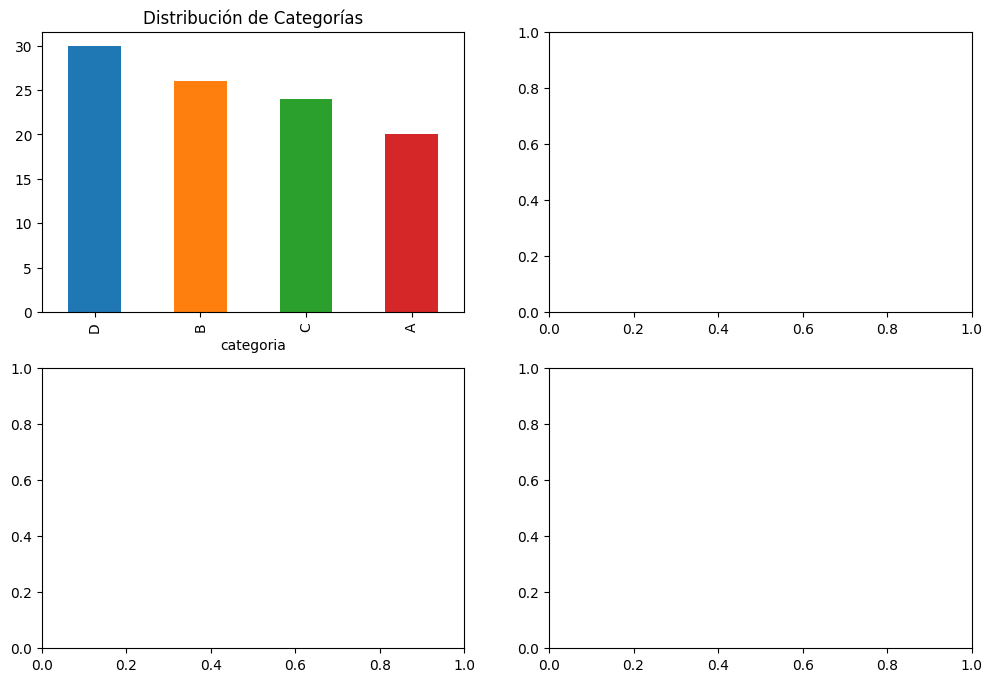

In [25]:
# Gráfico de barras con paleta cualitativa efectiva
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
df['categoria'].value_counts().plot(kind='bar', color=colores_cualitativos, ax=ax1)
ax1.set_title('Distribución de Categorías')

In [34]:
# 1. Gráfico cualitativo (bueno)
categoria_means = df.groupby('categoria')['valor'].mean()
bars1 = ax1.bar(categoria_means.index, categoria_means.values, 
                color=colores_cualitativos[:len(categoria_means)])
ax1.set_title('Promedio por Categoría\n(Paleta Cualitativa Clara)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Valor Promedio')
ax1.grid(axis='y', alpha=0.3)
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.1f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom') 



    
    

In [30]:
# 2. Gráfico secuencial (bueno para rangos)
segmento_means = df.groupby('segmento')['valor'].mean().sort_values()
bars2 = ax2.barh(segmento_means.index, segmento_means.values,
                 color=colores_secuenciales[:len(segmento_means)])
ax2.set_title('Valor por Segmento\n(Paleta Secuencial)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Valor')

for bar in bars2:
    width = bar.get_width()
    ax2.annotate(f'{width:.1f}',
                 xy=(width, bar.get_y() + bar.get_height() / 2),
                 xytext=(3, 0),  # 3 points horizontal offset
                 textcoords="offset points",
                 ha='left', va='center') 

In [20]:
# 3. Gráfico con colores problemáticos (mal ejemplo)
region_counts = df['region'].value_counts()
bars3 = ax3.bar(region_counts.index, region_counts.values, 
                color=['red', 'red', 'blue', 'blue'])  # Colores similares problemáticos
ax3.set_title('Conteo por Región\n(Paleta Problemática)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Conteo')


Text(4.444444444444466, 0.5, 'Conteo')

In [21]:
# 4. Gráfico con buena jerarquía visual
scatter = ax4.scatter(df['valor'], range(len(df)), 
                     c=df['categoria'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3}),
                     cmap='Set1', alpha=0.7, s=50)
ax4.set_title('Relación con Jerarquía Visual\n(Tamaño y Color)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Valor')
ax4.set_ylabel('Índice')

plt.tight_layout()
plt.savefig('principios_visuales_ejemplos.png', dpi=100, bbox_inches='tight')
print("\nGráfico guardado como 'principios_visuales_ejemplos.png'")


Gráfico guardado como 'principios_visuales_ejemplos.png'


<Figure size 640x480 with 0 Axes>

### Evaluación de accesabilidad de colores

In [22]:
# Función simple para verificar contraste básico
def calcular_contraste(color1, color2):
    # Versión simplificada - en producción usar librerías especializadas
    # Contraste mínimo recomendado: 4.5:1
    return "Verificación manual requerida para producción"

print("\nEvaluación de accesibilidad:")
print("- Verificar que textos sean legibles sobre fondos")
print("- Usar herramientas como WebAIM Contrast Checker")
print("- Considerar daltonismo en diseño de paletas")
print("- Probar visualizaciones en escala de grises")


Evaluación de accesibilidad:
- Verificar que textos sean legibles sobre fondos
- Usar herramientas como WebAIM Contrast Checker
- Considerar daltonismo en diseño de paletas
- Probar visualizaciones en escala de grises
